In [7]:
import os
import torch
import csv
import random
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.utils.data as data_utils


In [8]:
#constant declaration
NUM_EPOCHS = 50
LEARNING_RATE = 1e-3
BATCH_SIZE = 30

In [9]:
# importing benign and mixed flow datasets from tran_feature_selection

# Re-enable these three lines when using real data instead of sample_flows.csv
# %store -r benign_flows  
# %store -r mixed_flows
# %store -r features

# This is a subset of mixed data intended only for making sure the model works on our data format
# actual analysis should use benign_flows and mixed_flows that were stored by tran_feature_selection
benign_flows = pd.read_csv("sample_flows.csv", index_col=None, delimiter=',') 

features_ori = ['flowInd', 'duration', 'numHdrDesc',
            'l4Proto', 'macPairs', 'dstPortClassN', 'numPktsSnt', 'numPktsRcvd',
            'numBytesSnt', 'numBytesRcvd', 'minPktSz', 'maxPktSz', 'avePktSize', 'stdPktSize', 'pktps', 'bytps',
            'pktAsm', 'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipOptCnt',
            'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt', 'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt',
            'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz', 'tcpWinSzDwnCnt', 'tcpWinSzUpCnt',
            'tcpWinSzChgDirCnt', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpMSS', 'tcpWS', 'tcpTmS', 'tcpTmER', 'tcpEcI',
            'tcpBtm', 'tcpSSASAATrip', 'tcpRTTAckTripMin', 'tcpRTTAckTripMax', 'tcpRTTAckTripAve',
            'tcpRTTAckTripJitAve', 'tcpRTTSseqAA', 'tcpRTTAckJitAve', 'icmpTCcnt', 'icmpEchoSuccRatio', 'icmpPFindex',
            'connSip', 'connDip', 'connSipDip', 'connSipDprt', 'connF',  'aveIAT', 'maxIAT', 
                'stdIAT', 'tcpISeqN', 'tcpUtm', 'tcpWinSzThRt']
benign_flows1 = pd.DataFrame(benign_flows[features_ori])

features = benign_flows1.columns
dim = len(features)

training = preprocessing.normalize(benign_flows1)
train_data = pd.DataFrame(training, columns = features)
train_data.head(10)
# target = []
# for i in range(len(benign_flows1.index)):
#     target.append(random.randint(0,1))
    
# target = np.asarray(target)


,flowInd,duration,numHdrDesc,l4Proto,macPairs,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,...,connDip,connSipDip,connSipDprt,connF,aveIAT,maxIAT,stdIAT,tcpISeqN,tcpUtm,tcpWinSzThRt
0,1.719633e-09,3.272033e-10,1.719633e-09,1.031780e-08,1.719633e-09,7.617976e-07,5.158900e-09,5.158900e-09,5.330864e-08,5.330864e-08,...,1.719633e-09,6.878534e-09,6.878534e-09,6.878534e-09,1.090678e-10,3.250314e-10,1.246882e-10,1.000000,0.000000,5.732111e-10
1,6.690476e-10,1.251119e-13,6.690476e-10,4.014286e-09,6.690476e-10,2.963881e-07,2.007143e-09,2.007143e-09,2.074048e-08,2.074048e-08,...,6.690476e-10,2.007143e-09,2.007143e-09,2.007143e-09,4.170397e-14,7.225715e-14,2.182975e-14,1.000000,0.000000,0.000000e+00
2,1.266250e-09,6.455886e-09,6.331249e-10,3.798749e-09,6.331249e-10,2.804743e-07,5.698124e-09,5.064999e-09,6.597161e-07,1.095306e-07,...,6.331249e-10,2.532499e-09,3.798749e-09,1.266250e-09,7.173210e-10,5.867796e-09,1.687956e-09,0.253647,0.000008,7.034720e-11
3,1.167994e-09,5.844398e-09,5.839969e-10,3.503981e-09,5.839969e-10,2.587106e-07,4.671975e-09,5.255972e-09,1.010315e-07,6.085247e-07,...,1.751991e-09,1.751991e-09,2.919984e-09,2.919984e-09,7.305497e-10,5.412254e-09,1.618094e-09,1.000000,0.000000,0.000000e+00
4,3.648970e-09,5.315429e-09,5.212815e-10,3.127689e-09,5.212815e-10,2.309277e-07,4.691533e-09,4.170252e-09,5.431753e-07,9.018169e-08,...,5.212815e-10,1.042563e-09,4.170252e-09,8.340503e-10,5.906030e-10,4.892209e-09,1.409307e-09,0.604743,0.000007,5.792016e-11
5,8.720277e-09,1.246975e-08,1.245754e-09,7.474523e-09,1.245754e-09,5.518689e-07,9.966031e-09,1.121178e-08,2.155154e-07,1.298075e-06,...,6.228769e-09,1.245754e-09,8.720277e-09,8.720277e-09,1.558720e-09,1.169091e-08,3.501059e-09,1.000000,0.000000,0.000000e+00
6,8.376875e-09,2.984813e-13,4.408882e-10,2.645329e-09,4.408882e-10,1.953135e-07,8.817763e-10,0.000000e+00,1.366753e-08,0.000000e+00,...,4.408882e-10,8.817763e-10,3.967993e-09,6.613322e-10,1.492406e-13,2.984813e-13,1.055290e-13,0.578090,0.000006,0.000000e+00
7,5.807101e-09,2.679887e-10,3.226167e-10,1.935700e-09,3.226167e-10,1.429192e-07,3.548784e-09,2.258317e-09,2.171210e-07,1.458550e-06,...,3.226167e-10,6.452334e-10,3.226167e-09,4.608809e-10,2.436261e-11,6.193982e-11,2.424082e-11,0.870087,0.000004,0.000000e+00
8,8.747866e-08,3.159199e-09,4.859925e-09,2.915955e-08,4.859925e-09,2.152947e-06,3.401948e-08,5.345918e-08,2.197172e-05,3.270730e-06,...,3.401948e-08,4.859925e-09,4.373933e-08,4.373933e-08,4.513142e-10,1.129374e-09,4.443641e-10,1.000000,0.000000,0.000000e+00
9,1.204272e-08,5.721229e-09,5.473963e-10,3.284378e-09,5.473963e-10,2.424966e-07,7.116152e-09,6.021359e-09,4.975833e-07,2.491748e-06,...,5.473963e-10,2.189585e-09,5.473963e-09,9.123274e-10,4.400945e-10,5.102580e-09,1.284265e-09,0.548242,0.000007,4.210741e-11


In [10]:
#dataset loading
train_tensor = torch.tensor(train_data.values.astype(np.float32))
train_loader = torch.utils.data.DataLoader(train_tensor, batch_size = BATCH_SIZE, shuffle = False)
print(train_tensor)


tensor([[1.7196e-09, 3.2720e-10, 1.7196e-09,  ..., 1.0000e+00, 0.0000e+00,
         5.7321e-10],
        [6.6905e-10, 1.2511e-13, 6.6905e-10,  ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.2662e-09, 6.4559e-09, 6.3312e-10,  ..., 2.5365e-01, 8.2613e-06,
         7.0347e-11],
        ...,
        [5.8911e-03, 0.0000e+00, 1.0790e-05,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.3311e-03, 0.0000e+00, 1.5258e-05,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.2736e-08, 1.2090e-07, 3.9951e-10,  ..., 3.8981e-01, 8.0702e-09,
         0.0000e+00]])


In [11]:
#encoder decoder 

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.enc1 = nn.Linear(in_features=dim, out_features=int(dim/2))
        self.enc2 = nn.Linear(in_features=int(dim/2), out_features=int(dim/4))
        self.enc3 = nn.Linear(in_features=int(dim/4), out_features=int(dim/8))
        #self.enc4 = nn.Linear(in_features=int(dim/4), out_features=int(dim/8))
        
        # decoder 
        self.dec1 = nn.Linear(in_features=int(dim/8), out_features=int(dim/4))
        self.dec2 = nn.Linear(in_features=int(dim/4), out_features=int(dim/2))
        self.dec3 = nn.Linear(in_features=int(dim/2), out_features=dim)
        #self.dec4 = nn.Linear(in_features=dim, out_features=dim)
        
    def forward(self, x):
#         x = F.relu(self.enc1(x))
#         x = F.relu(self.enc2(x))
#         x = F.relu(self.enc3(x))
        
#         x = F.relu(self.dec1(x))
#         x = F.relu(self.dec2(x))
#         x = F.relu(self.dec3(x))
        
        #sigmoid activation
        x = F.sigmoid(self.enc1(x))
        x = F.sigmoid(self.enc2(x))
        x = F.sigmoid(self.enc3(x))
        #x = F.relu(self.enc4(x))

        x = F.sigmoid(self.dec1(x))
        x = F.sigmoid(self.dec2(x))
        x = F.sigmoid(self.dec3(x))
        #x = F.relu(self.dec4(x))
        return x
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Autoencoder()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

#print(net)

C:\Users\arifu\anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1 of 50, Train Loss: 0.582
Epoch 6 of 50, Train Loss: 0.089
Epoch 11 of 50, Train Loss: 0.069
Epoch 16 of 50, Train Loss: 0.065
Epoch 21 of 50, Train Loss: 0.064
Epoch 26 of 50, Train Loss: 0.063
Epoch 31 of 50, Train Loss: 0.062
Epoch 36 of 50, Train Loss: 0.062
Epoch 41 of 50, Train Loss: 0.062
Epoch 46 of 50, Train Loss: 0.062


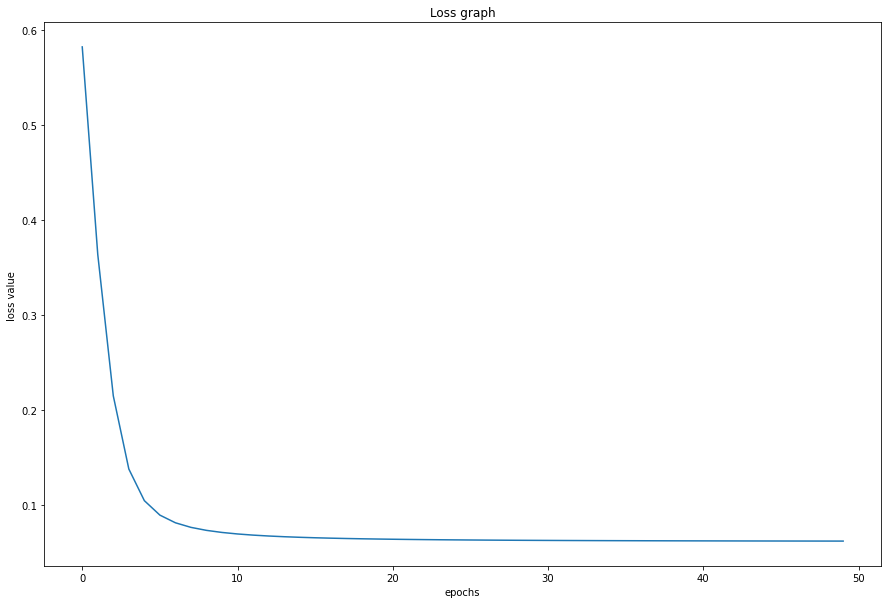

In [12]:
#Trainning model

loss_function = nn.BCELoss()                      #nn.BCEWithLogitsLoss()  #MSELoss too
get_loss = list()
def training(net, trainloader, epochs):
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for data in train_loader:
            input_data = data.to(device=device)
            optimizer.zero_grad()
            output = net(input_data).to(device=device)          # output is the reconstruced x 
            loss = loss_function(output,input_data).to(device=device) # input_data should be the target variable
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        loss = running_loss / len(trainloader)
        train_loss.append(loss)
        
        if epoch % 5 == 0:
            print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, NUM_EPOCHS, loss))
    return train_loss

get_loss = training(net, train_loader, NUM_EPOCHS)
get_loss
#plotting of get_loss 

_, ax = plt.subplots(1,1,figsize=(15,10))
plt.xlabel("epochs")
plt.ylabel("loss value ")
ax.set_title('Loss graph')
ax.plot(get_loss)
            

In [13]:
#Prediction threshold 

# net.eval()

# loss_distr = []

# test_data = pd.read_csv("mixed_flows.csv", index_col=None, delimiter=',') # when loading from csv  

# # test_data = pd.DataFrame(mixed_flows)                                   # when loading from stored data

# for i in range(len(test_data)):
#     data = torch.from_numpy(np.array(test_data).float())
#     input_sample = net(data.to(device))
#     loss = loss_function(data.to(device), input_sample)
#     loss_distr.append(loss.item())

# loss_sc = []
# for i in loss_distr:
#     loss_sc.append((i,i))
# plt.scatter(*zip(*loss_sc))
# plt.axvline(0, 0, 1)
                            
    

C:\Users\arifu\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


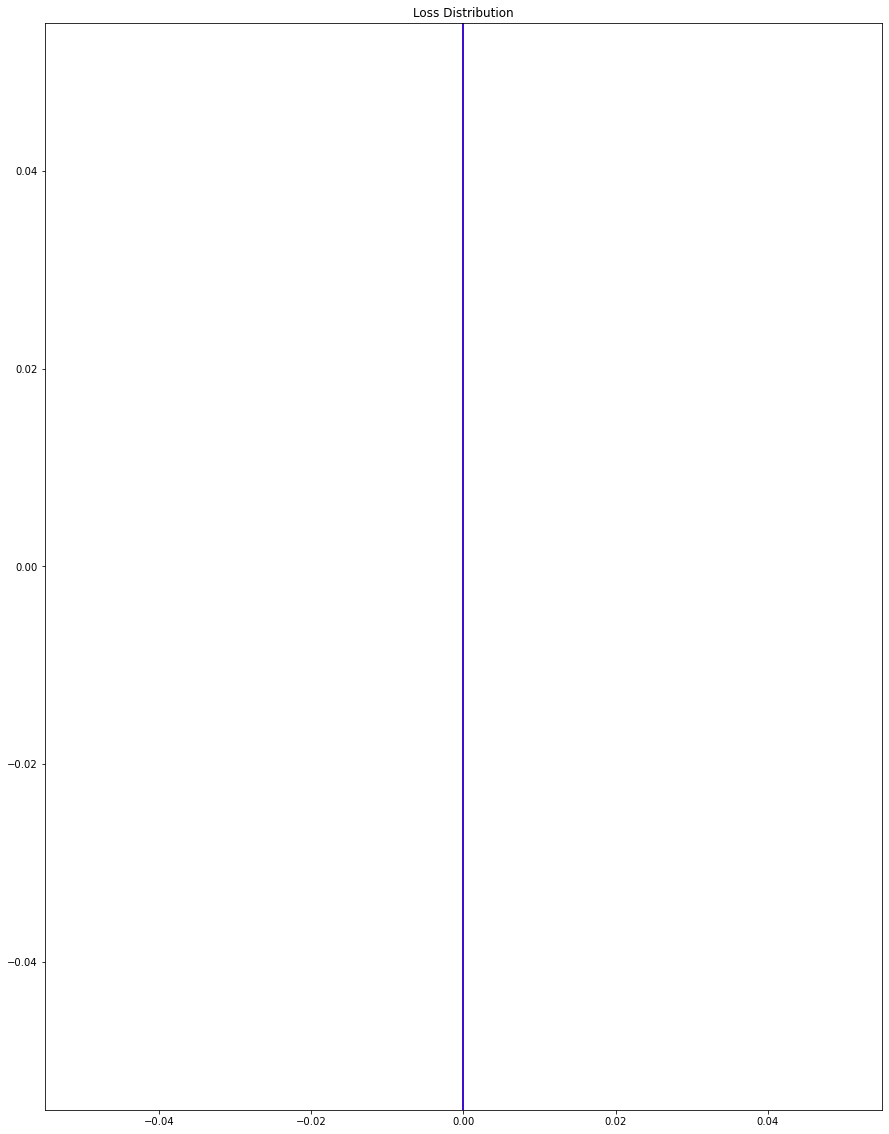

In [34]:
# lower_threshold = 0   #have to find the threshold
# upper_threshold = 0
# plt.figure(figsize=(15,20))
# plt.title('Loss Distribution')
# sns.distplot(loss_distr,bins=100,kde=True, color='blue')
# plt.axvline(upper_threshold, 0.0,10 , color='r')
# plt.axvline(lower_threshold, 0.0,10 , color='b')